In [1]:
# Import required libraries

import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# importing data set
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Research/Merged_data.csv")
# observing
df.head()

,fileclass,content
0,ChildProtection,TRENDS IN ONLINE CHILD SEXUAL ABUSE MATERIAL1\...
1,ChildProtection,COVID-19: DIGITAL AND REMOTE \nAPPROACHES IN E...
2,ChildProtection,\nJournal Pre-proof\nDigital media use and su...
3,ChildProtection,OrigiNAL Ar TiCLE\nsexual Exploitation and Abu...
4,ChildProtection,COVID-19 and its implications \nfor protecting...


In [9]:
# lowercasing
df["content"] = df["content"].str.lower()
df.head()

,fileclass,content
0,ChildProtection,trends in online child sexual abuse material1\...
1,ChildProtection,covid-19: digital and remote \napproaches in e...
2,ChildProtection,\njournal pre-proof\ndigital media use and su...
3,ChildProtection,original ar ticle\nsexual exploitation and abu...
4,ChildProtection,covid-19 and its implications \nfor protecting...


In [11]:
# change both types into string
df['content'] = df['content'].astype('str')
df['fileclass'] = df['fileclass'].astype('str') 

In [12]:
# removing urls

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
 
df["content"] = df["content"].apply(lambda text: remove_urls(text))

df.head()

,fileclass,content
0,ChildProtection,trends in online child sexual abuse material1\...
1,ChildProtection,covid-19: digital and remote \napproaches in e...
2,ChildProtection,\njournal pre-proof\ndigital media use and su...
3,ChildProtection,original ar ticle\nsexual exploitation and abu...
4,ChildProtection,covid-19 and its implications \nfor protecting...


In [13]:
# remove html tags
from bs4 import BeautifulSoup

def remove_html(text):
    return BeautifulSoup(text, "lxml").text

df["content"] = df["content"].apply(lambda text: remove_html(text))

df.head()

,fileclass,content
0,ChildProtection,trends in online child sexual abuse material1\...
1,ChildProtection,covid-19: digital and remote \napproaches in e...
2,ChildProtection,journal pre-proof\ndigital media use and subse...
3,ChildProtection,original ar ticle\nsexual exploitation and abu...
4,ChildProtection,covid-19 and its implications \nfor protecting...


In [14]:
# remove emails

def remove_emails(text):
    email_pattern = re.compile(r'\S+@\S+')
    return email_pattern.sub(r'', text)

df["content"] = df["content"].apply(lambda text: remove_emails(text))
df.head()

,fileclass,content
0,ChildProtection,trends in online child sexual abuse material1\...
1,ChildProtection,covid-19: digital and remote \napproaches in e...
2,ChildProtection,journal pre-proof\ndigital media use and subse...
3,ChildProtection,original ar ticle\nsexual exploitation and abu...
4,ChildProtection,covid-19 and its implications \nfor protecting...


In [17]:
# remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))

# read in custom stopwords list from text file
with open('/content/drive/MyDrive/Colab Notebooks/Research/Stoplist.txt', 'r') as file:
    custom_stopwords = set(file.read().split())

# add custom stopwords to the existing STOPWORDS set
STOPWORDS = STOPWORDS.union(custom_stopwords)

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["content"] = df["content"].apply(lambda text: remove_stopwords(text))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,fileclass,content
0,ChildProtection,trends online child sexual abuse material1 tre...
1,ChildProtection,covid-19: digital remote approaches eliminatin...
2,ChildProtection,journal pre-proof digital media subsequent sel...
3,ChildProtection,original ar ticle sexual exploitation abuse ch...
4,ChildProtection,covid-19 implications protecting children onli...


In [18]:
# remove punctuations

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["content"] = df["content"].apply(lambda text: remove_punctuation(text))
df.head()

,fileclass,content
0,ChildProtection,trends online child sexual abuse material1 tre...
1,ChildProtection,covid19 digital remote approaches eliminating ...
2,ChildProtection,journal preproof digital media subsequent self...
3,ChildProtection,original ar ticle sexual exploitation abuse ch...
4,ChildProtection,covid19 implications protecting children onlin...


In [19]:
# remove numbers

def remove_numbers(text):
    number_pattern = re.compile(r'\d+')
    return number_pattern.sub(r'', text)

df["content"] = df["content"].apply(lambda text: remove_numbers(text))
df.head()


,fileclass,content
0,ChildProtection,trends online child sexual abuse material tren...
1,ChildProtection,covid digital remote approaches eliminating fe...
2,ChildProtection,journal preproof digital media subsequent self...
3,ChildProtection,original ar ticle sexual exploitation abuse ch...
4,ChildProtection,covid implications protecting children online ...


In [20]:
def remove_non_alpha(text):
    non_alpha_pattern = re.compile(r'[^a-zA-Z\s]')
    return non_alpha_pattern.sub(r'', text)

df["content"] = df["content"].apply(lambda text: remove_non_alpha(text))
df.head()

,fileclass,content
0,ChildProtection,trends online child sexual abuse material tren...
1,ChildProtection,covid digital remote approaches eliminating fe...
2,ChildProtection,journal preproof digital media subsequent self...
3,ChildProtection,original ar ticle sexual exploitation abuse ch...
4,ChildProtection,covid implications protecting children online ...


In [21]:
# remove extra white space
def remove_extra_whitespaces(text):
    whitespace_pattern = re.compile(r'\s+')
    return whitespace_pattern.sub(' ', text)

df["content"] = df["content"].apply(lambda text: remove_extra_whitespaces(text))
df.head()


,fileclass,content
0,ChildProtection,trends online child sexual abuse material tren...
1,ChildProtection,covid digital remote approaches eliminating fe...
2,ChildProtection,journal preproof digital media subsequent self...
3,ChildProtection,original ar ticle sexual exploitation abuse ch...
4,ChildProtection,covid implications protecting children online ...


In [22]:
# remove one letter word such as e a l
def remove_single_letter_words(text):
    return " ".join([word for word in str(text).split() if len(word) > 1])

df["content"] = df["content"].apply(lambda text: remove_single_letter_words(text))
df.head()

,fileclass,content
0,ChildProtection,trends online child sexual abuse material tren...
1,ChildProtection,covid digital remote approaches eliminating fe...
2,ChildProtection,journal preproof digital media subsequent self...
3,ChildProtection,original ar ticle sexual exploitation abuse ch...
4,ChildProtection,covid implications protecting children online ...


In [ ]:
# # remove non english text
# from langdetect import detect

# def remove_non_english(text):
#     words = text.split()
#     english_words = [word for word in words if detect(word)=='en']
#     return " ".join(english_words)

# df["content"] = df["content"].apply(lambda text: remove_non_english(text))
# df.head()

In [23]:
# lemmatisation

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df["content"] = df["content"].apply(lambda text: lemmatize_words(text))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,fileclass,content
0,ChildProtection,trend online child sexual abuse material trend...
1,ChildProtection,covid digital remote approach eliminate female...
2,ChildProtection,journal preproof digital medium subsequent sel...
3,ChildProtection,original ar ticle sexual exploitation abuse ch...
4,ChildProtection,covid implication protect child online april c...


In [24]:
# remove stopwords once again to get rid of any
STOPWORDS = set(stopwords.words('english'))

# read in custom stopwords list from text file
with open('/content/drive/MyDrive/Colab Notebooks/Research/Stoplist.txt', 'r') as file:
    custom_stopwords = set(file.read().split())

# add custom stopwords to the existing STOPWORDS set
STOPWORDS = STOPWORDS.union(custom_stopwords)

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["content"] = df["content"].apply(lambda text: remove_stopwords(text))
df.head()

,fileclass,content
0,ChildProtection,trend online child sexual abuse material trend...
1,ChildProtection,covid digital remote eliminate female genital ...
2,ChildProtection,journal preproof digital medium subsequent sel...
3,ChildProtection,original ar ticle sexual exploitation abuse ch...
4,ChildProtection,covid implication protect child online april c...


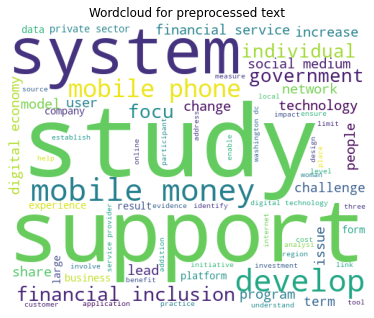

In [25]:
# word cloud to check the spread of words
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_words = '' 

# to extract most common words
for arg in df["content"]: 

    tokens = arg.split()  
      
    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 500, height = 400, 
                background_color ='white', 
                min_font_size = 10).generate(all_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.title("Wordcloud for preprocessed text") 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [29]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/Research/cleaned2.csv",index=True)

In [28]:
df.content.iloc[500]

'international journal clinical medical science volume issue international journal clinical medical science pissn eissn original impact digital health intervention curb covid zimbabwe stephen chidhau bismark mutizwa tinashe muzama university zimbabwe zimbabwe article history receive revise accepted correspond author bismark mutizwa email open access article license ccbysa abstract amid ongoing digital health intervention dhi zimbabwe overlook impact dhi mitigate spread covid contribute filling knowledge gap study seek examine dhi strategy adopt curb inimical covid zimbabwe dhi telemedicine social medium electronic medical record emrs mobile health mhealth healthcare system disposed curtail spread covid limitation hurdle cripple dhi discuss extensively study adopts qualitative design comprise personal interview documentary review preliminary finding dhis effectively employ routine innovative form communication technology ict address health factor corruption lack funding shortage qualify